In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 001 - Carregamento e Preparação Inicial


In [2]:
# Carrega o dataset original
file_path = "../data/datatran2024.csv"
df = pd.read_csv(file_path, sep=';', encoding='latin-1', low_memory=False)

# Padroniza nomes das colunas
df.columns = df.columns.str.strip().str.lower()

# Converte colunas de data e hora
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format="%d/%m/%Y")
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S', errors='coerce').dt.hour

# Padroniza strings nas colunas categóricas
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

### 002 - Métricas Descritivas


In [3]:
# Distribuição por tipo de acidente
tipo_acidente = df['tipo_acidente'].value_counts().reset_index()
tipo_acidente.columns = ['tipo_acidente', 'quantidade']
fig1 = px.bar(tipo_acidente, x='tipo_acidente', y='quantidade', title='Distribuição por Tipo de Acidente')
fig1.show()

# Distribuição por horário
horario = df['horario'].value_counts().sort_index().reset_index()
horario.columns = ['hora', 'quantidade']
fig2 = px.line(horario, x='hora', y='quantidade', title='Distribuição de Acidentes por Horário')
fig2.show()

# Distribuição por condição climática
cond_met = df['condicao_metereologica'].value_counts().reset_index()
cond_met.columns = ['condicao_metereologica', 'quantidade']
fig3 = px.bar(cond_met, x='condicao_metereologica', y='quantidade', title='Distribuição por Condição Climática')
fig3.show()

### 003 - Análises de Correlação


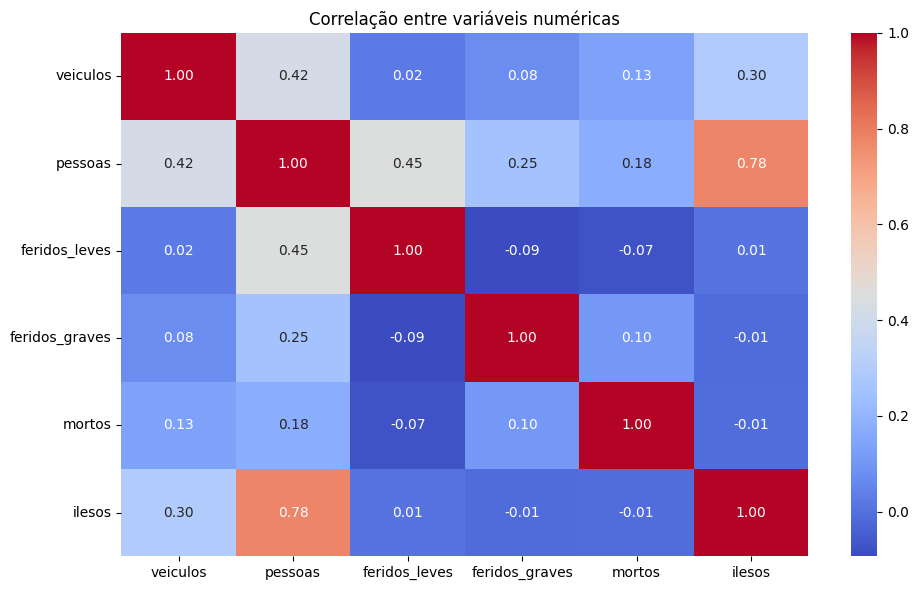

In [4]:
# Seleciona variáveis quantitativas relevantes
corr_df = df[['veiculos', 'pessoas', 'feridos_leves', 'feridos_graves', 'mortos', 'ilesos']].copy()

# Remove linhas com dados ausentes
corr_df.dropna(inplace=True)

# Matriz de correlação
corr_matrix = corr_df.corr()

# Heatmap de correlação
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre variáveis numéricas')
plt.tight_layout()
plt.show()